
---



---

#Random Forest

---



---


**Random Forest**, functioning as a binary classifier, harnesses the collective insights of multiple decision trees to deliver accurate predictions for binary classification tasks. You can refer to [RandomForest Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more information.



In this notebook, we'll use Random Forest for binary classification on the MNIST dataset and compare its performance with SGD using ROC curves.



## Import MNIST dataset

In [1]:
# Importing the fetch_openml function from scikit-learn's datasets module
from sklearn.datasets import fetch_openml

# Fetching the MNIST dataset using the fetch_openml function
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Printing the keys of the fetched dataset
mnist.keys()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# Assigning the input features to X and the target labels to y
X, y = mnist["data"], mnist["target"]

# Printing the shape of the input features X
X.shape


(70000, 784)

In [ ]:
# Printing the shape of the target labels y
y.shape


(70000,)

In [3]:
# Printing the shape of the target labels y
# Each label represents a digit image
28 * 28



784

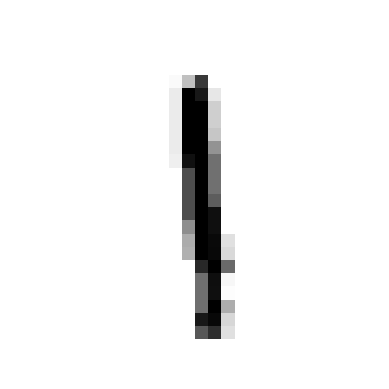

In [4]:
# Importing necessary libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Setting font sizes for axes labels and ticks
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Displaying a digit from the dataset
some_digit = X[8]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()


In [5]:
# Displaying the label corresponding to the digit
y[8]


'1'

In [6]:
# Importing the NumPy library
import numpy as np

# Converting the target labels to unsigned integers
y = y.astype(np.uint8)



##Splitting the dataset into training and testing sets

In [9]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# Prepar for a Binary Classification

In [10]:
# Creating binary labels for classification (5 or not 5)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


##Setup SGD model

In [11]:
# Importing the Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

# Instantiating the SGDClassifier with specified parameters
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Fitting the SGDClassifier to the training data
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

##Evaluate the model

In [12]:
# Importing the cross_val_score function from scikit-learn's model_selection module
from sklearn.model_selection import cross_val_score

# Performing 3-fold cross-validation on the SGDClassifier model using accuracy as the scoring metric
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [24]:
# Import the cross_val_predict function from the model_selection module in scikit-learn
from sklearn.model_selection import cross_val_predict

# Use cross-validation to make predictions on the training set using the SGDClassifier
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [25]:
# Importing the confusion_matrix function from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix for the training set predictions
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [26]:
# Assuming perfect predictions on the training set
y_train_perfect_predictions = y_train_5

# Calculating the confusion matrix for perfect predictions
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

## Precision and Recall


- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.
  - Formula: Precision = TP / (TP + FP)

- **Recall**: Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
  - Formula: Recall = TP / (TP + FN)

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off

- The precision/recall tradeoff refers to the balance between precision and recall in a binary classifier.
- Increasing one typically leads to a decrease in the other, and finding the optimal tradeoff depends on the specific requirements of the classification task.

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-2226.78132866])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [32]:
y_some_digit_pred

array([False])

In [33]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [36]:


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


In [37]:
(y_train_pred == (y_scores > 0)).all()

True

In [38]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [39]:
threshold_90_precision

3370.0194991439557

In [40]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve


-  ROC (Receiver Operating Characteristic) curve visualizes the trade-off between true positive rate (TPR) and false positive rate (FPR) across different threshold values.
  - Formula: TPR = TP / (TP + FN), FPR = FP / (FP + TN)

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [44]:

fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]


In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#Setup the RandomForestClassifier

In [13]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Creating a RandomForestClassifier with 100 trees
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing cross-validation and obtaining class probabilities using predict_proba method
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


In [19]:
# Extracting the probabilities of the positive class (score) from the predicted class probabilities
y_scores_forest = y_probas_forest[:, 1]

# Computing the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


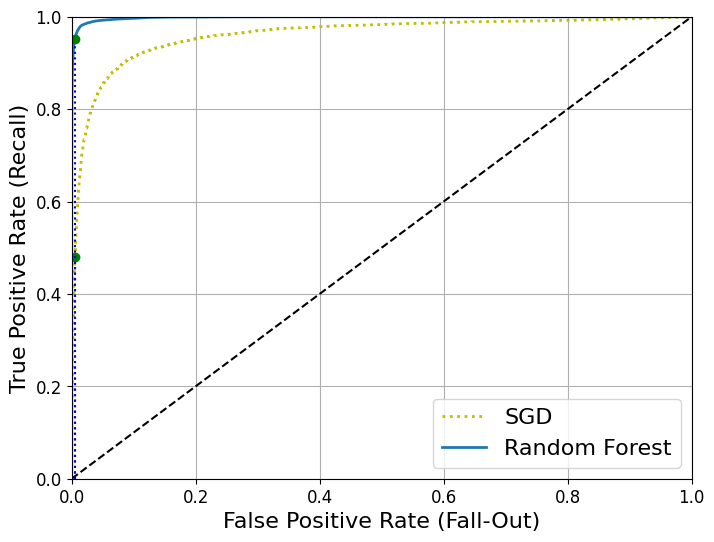

In [46]:
# Importing the roc_curve function from the sklearn.metrics module
from sklearn.metrics import roc_curve

# Defining a function to plot the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Plotting the ROC curve
    plt.plot([0, 1], [0, 1], 'k--')  # Plotting the dashed diagonal line
    plt.axis([0, 1, 0, 1])  # Setting the axis limits
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)  # Labeling the x-axis
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  # Labeling the y-axis
    plt.grid(True)  # Enabling the grid

# Calculating the recall for the forest classifier at the specified false positive rate threshold
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

# Creating the ROC curve plot
plt.figure(figsize=(8, 6))  # Setting the figure size
plt.plot(fpr, tpr, "y:", linewidth=2, label="SGD")  # Plotting the ROC curve for SGD
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")  # Plotting the ROC curve for Random Forest
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "b:")  # Plotting the vertical line for the specified FPR threshold
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "b:")  # Plotting the horizontal line for the specified recall
plt.plot([fpr_90], [recall_90_precision], "go")  # Marking the point on the ROC curve for the specified FPR and recall
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "b:")  # Plotting the vertical line for the forest classifier at the specified FPR threshold
plt.plot([fpr_90], [recall_for_forest], "go")  # Marking the point on the ROC curve for the forest classifier at the specified FPR and recall
plt.grid(True)  # Enabling the grid
plt.legend(loc="lower right", fontsize=16)  # Adding the legend
plt.show()  # Displaying the plot


In [47]:
# Calculate the ROC AUC score
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [22]:
# Use cross-validation to predict labels for training data using the Random Forest classifier
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

# Calculate precision score for the Random Forest classifier's predictions
precision_score(y_train_5, y_train_pred_forest)


0.9905083315756169

In [23]:
# Calculate recall score for the Random Forest classifier's predictions
recall_score(y_train_5, y_train_pred_forest)


0.8662608374838591